In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import math as m
import numpy as np

In [31]:
##Problem 7 

##Rule of Mixtures Compliance Matrix Construction

def S_Mixture(Ef,Gf,vf,Em,Gm,vm,Vf):
    E1= Ef*Vf + Em*(1-Vf)
    v12 = vf*Vf + vm*(1-Vf)
    E2_mix = 1/((Vf/Ef)+((1-Vf)/Em))
    G12_mix = 1/((Vf/Gf)+(1-Vf)/Gm)
    
    S11 = 1/E1
    S12 = -v12/E1
    S22 = 1/E2_mix
    S66 = 1/G12_mix
    
    S_mix = np.array([[S11,S12,0],[S12,S22,0],[0,0,S66]])
    C_mix = np.linalg.inv(S_mix)
    
    return S_mix,C_mix


In [32]:
##Halpin-Tsai Compliance Matrix Construction
def S_HalpinTsai(Ef,Gf,vf,Em,Gm,vm,Vf):
    E1= Ef*Vf + Em*(1-Vf)
    v12 = vf*Vf + vm*(1-Vf)
    
    n2 = ((Ef/Em)-1)/((Ef/Em)+2)
    E2_halpin = (Em*(1+2*n2*Vf))/(1-n2*Vf)
    
    n12 = ((Gf/Gm)-1)/((Gf/Gm)+1)
    G12_halpin = (Gm*(1+n12*Vf))/(1-n12*Vf)
    
    S11 = 1/E1
    S12 = -v12/E1
    S22 = 1/E2_halpin
    S66 = 1/G12_halpin
    
    S_Halpin = np.array([[S11,S12,0],[S12,S22,0],[0,0,S66]])
    C_Halpin = np.linalg.inv(S_Halpin)
    
    return S_Halpin,C_Halpin

In [42]:
##SiC properties as inputs
Vf = 0.5

Ef = 196e9
Gf = 79e9
vf = 0.14

Em = 68e9
Gm = 26e9
vm = 0.33

S_Mix, C_Mix = S_Mixture(Ef,Gf,vf,Em,Gm,vm,Vf)
S_Halpin, C_Halpin = S_HalpinTsai(Ef,Gf,vf,Em,Gm,vm,Vf)

print(S_Mix)
print(C_Mix)

print(S_Halpin)
print(C_Halpin)



[[ 7.57575758e-12 -1.78030303e-12  0.00000000e+00]
 [-1.78030303e-12  9.90396158e-12  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.55598832e-11]]
[[1.37821989e+11 2.47744200e+10 0.00000000e+00]
 [2.47744200e+10 1.05423064e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.91238095e+10]]
[[ 7.57575758e-12 -1.78030303e-12  0.00000000e+00]
 [-1.78030303e-12  8.56777494e-12  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.29599298e-11]]
[[1.38776569e+11 2.88364656e+10 0.00000000e+00]
 [2.88364656e+10 1.22708364e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.35541401e+10]]

138776569411.7924


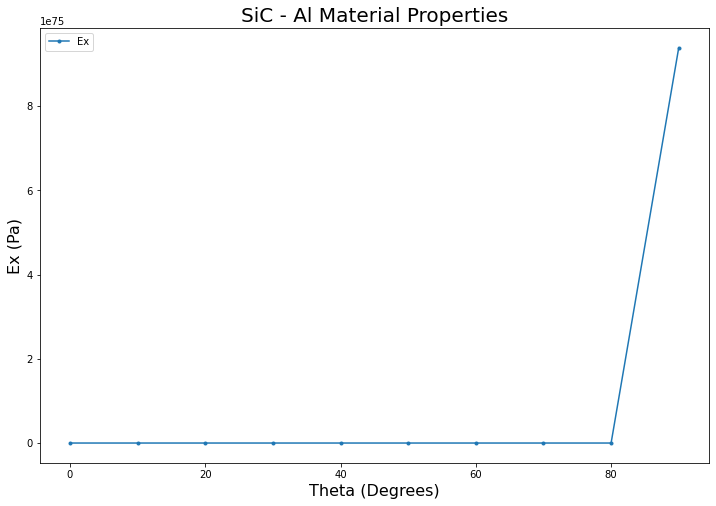

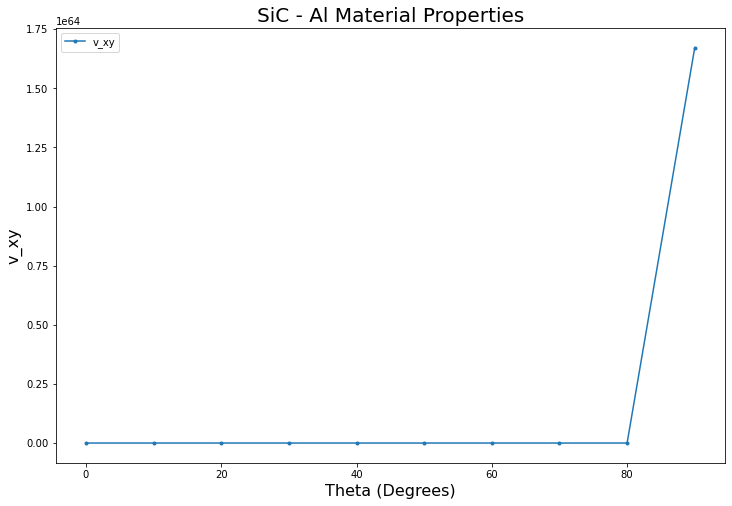

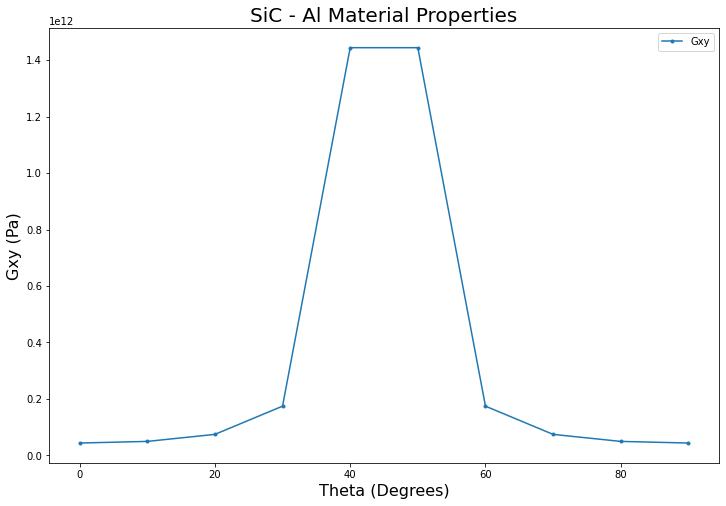

In [49]:
##Problem 8 
##Initialize material properties
import numpy as np
import math as m
import matplotlib.pyplot as plt

Vf = 0.5

Ef = 196e9
Gf = 79e9
vf = 0.14

Em = 68e9
Gm = 26e9
vm = 0.33




##Compute compliance
S_Halpin, C_Halpin = S_HalpinTsai(Ef,Gf,vf,Em,Gm,vm,Vf)

##Rotate the compliance matrices in intervals of 10 from 0 to 90 
S_rotations = []
thetas = [m.radians(0),m.radians(10),m.radians(20),m.radians(30),m.radians(40),m.radians(50),m.radians(60),m.radians(70),m.radians(80),m.radians(90)]
for th in thetas:
    T_prime = np.array([[(m.cos(th))**2,(m.sin(th))**2, m.cos(th)*m.sin(th)],[(m.sin(th))**2,(m.cos(th))**2,-m.cos(th)*m.sin(th)],[-2*m.cos(th)*m.sin(th),2*m.cos(th)*m.sin(th),(m.cos(th))**2 - (m.sin(th))**2]])
    T = np.array([[(m.cos(th))**2,(m.sin(th))**2, 2*m.cos(th)*m.sin(th)],[(m.sin(th))**2,(m.cos(th))**2,-2*m.cos(th)*m.sin(th)],[-m.cos(th)*m.sin(th),m.cos(th)*m.sin(th),(m.cos(th))**2 - (m.sin(th))**2]])
    S_rotated = np.linalg.inv(T_prime)*S_Halpin*T
    S_rotations.append(S_rotated)

E_x_values = []
v_xy_values = []
G_xy_values = []

##Compute Ex, Gxy, and vxy values
for S_th in S_rotations:
    S_11 = S_th[0][0]
    S_66 = S_th[2][2]
    S_12 = S_th[0][1]
    
    E_x_values.append(1/S_11)
    v_xy_values.append(-S_12/S_11)
    G_xy_values.append(1/S_66)
    
    
thetas = [0,10,20,30,40,50,60,70,80,90]



#Plot the experimental torque vs twist angle
plt.figure(figsize = (12,8))
plt.plot(thetas,E_x_values,'.-',label = 'Ex')
plt.xlabel('Theta (Degrees)',fontsize = 16)
plt.ylabel('Ex (Pa)',fontsize = 16)
plt.title('SiC - Al Material Properties', fontsize = 20)
plt.legend();

plt.figure(figsize = (12,8))
plt.plot(thetas,v_xy_values,'.-',label = 'v_xy')
plt.xlabel('Theta (Degrees)',fontsize = 16)
plt.ylabel('v_xy',fontsize = 16)
plt.title('SiC - Al Material Properties', fontsize = 20)
plt.legend();

plt.figure(figsize = (12,8))
plt.plot(thetas,G_xy_values,'.-',label = 'Gxy')
plt.xlabel('Theta (Degrees)',fontsize = 16)
plt.ylabel('Gxy (Pa)',fontsize = 16)
plt.title('SiC - Al Material Properties', fontsize = 20)
plt.legend();




